# Classifying Hand-Drawn Digits from the MNIST Dataset Using Artificial Neural Networks

In this notebook, we will build and train an Artificial Neural Network (ANN) to classify handwritten digits from the famous MNIST dataset.

## About the MNIST Dataset
The MNIST (Modified National Institute of Standards and Technology) dataset is a collection of 70,000 grayscale images of handwritten digits (0-9), each 28x28 pixels. It serves as a benchmark dataset in machine learning, containing 60,000 training images and 10,000 test images.

## Purpose of Using ANN for Image Classification
Artificial Neural Networks are well-suited for image classification tasks as they can learn complex patterns and features from pixel data. For MNIST, we'll use a feedforward neural network to map input pixels to digit classes, demonstrating fundamental deep learning concepts.

## Steps
1. **Data Preprocessing**: Loading MNIST data, normalizing pixel values, and reshaping images
2. **Model Architecture**: Designing a multi-layer neural network with appropriate activation functions
3. **Training**: Implementing backpropagation with optimization techniques
4. **Evaluation**: Assessing model performance using accuracy metrics and confusion matrices

## Expected Outcomes
We expect to achieve >95% accuracy on the test set. The model will learn to identify distinctive features of each digit class through iterative weight optimization.

In [33]:
# Import the necessary packages
import keras
import numpy as np
import matplotlib.pyplot as plt

## Load and Process the Data

Note that the MNIST data comes in pre-split into training and testing tuples.



In [21]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape
X_train[0][15]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

We see that the training data has 60,000 samples, and that the images are 28x28 pixels each. We also see that colors are in the range of 0-255. Let's scale that between 0 and 1.

In [22]:
X_train, X_test = X_train / 255.0, X_test / 255.0

## Build and Train the Model

Let us now build the ANN architecture we intend to use for this multiclass classification project.

In [36]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


A note on the `Dropout` layer:

It is important that our model learns the classification evenly, and does not rely unnecessarily more on some inputs over others. The argument to the `Dropout` layer is the percentage of nodes to randomly 'drop' (set to 0) every time we run the model.

In [37]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
result = model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8556 - loss: 0.4911
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9553 - loss: 0.1497
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9669 - loss: 0.1060
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9727 - loss: 0.0899
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9780 - loss: 0.0723
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9811 - loss: 0.0604
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9825 - loss: 0.0546
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9843 - loss: 0.0489
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9846 - loss: 0.0452
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9865 - loss: 0.0411
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9872 - loss: 0.0388
Epoch 12/15
1875/1875 ━━━━━━━━

Let's visualize the loss and accuracy over the epochs.

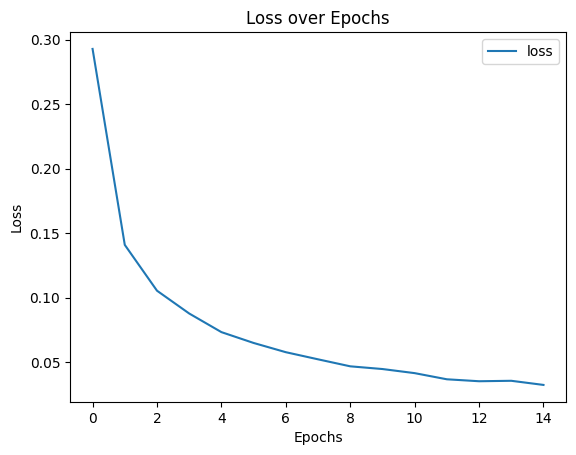

In [38]:
plt.plot(result.history['loss'], label='loss')
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

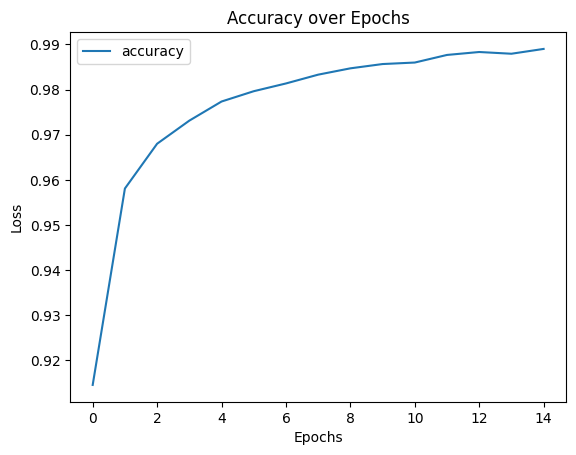

In [39]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Evaluate the Model

In [41]:
print(model.evaluate(X_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 0.1052
[0.08249084651470184, 0.9796000123023987]


97% accuracy. Not bad. Let's see the confusion matrix for our model to better see what kind of misclassification errors our model makes. Let's also visualize some of the misclassified images.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step


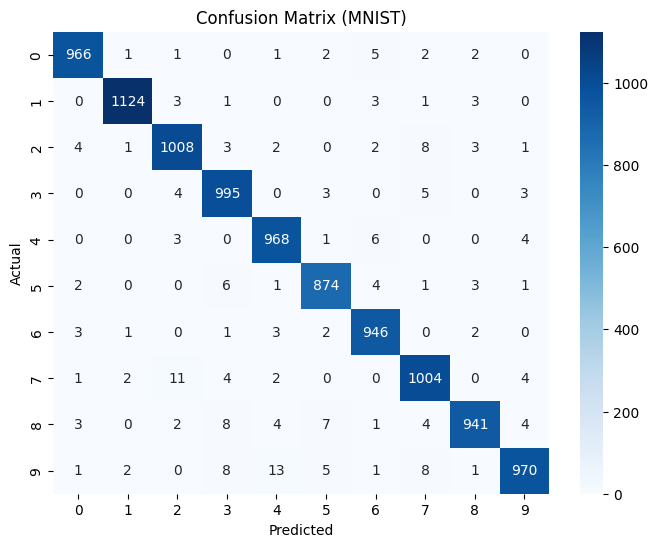

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(X_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (MNIST)")
plt.show()

Text(0.5, 1.0, 'Predicted: 4, Actual: 6')

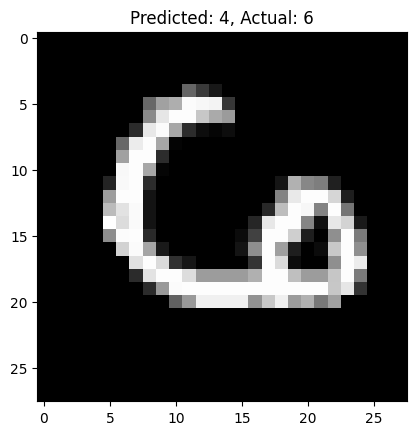

In [53]:
misclassified_idx = np.where(y_pred != y_test)[0]
idx = np.random.choice(misclassified_idx)
plt.imshow(X_test[idx], cmap='grey')
plt.title(f"Predicted: {y_pred[idx]}, Actual: {y_test[idx]}")

To be frank, even I'd misclassify some of those!

This notebook demonstrated how to build and train an Artificial Neural Network (ANN) to classify handwritten digits using the MNIST dataset.

By preprocessing the data, designing an effective neural network architecture, and optimizing the model through training, we achieved high test accuracy (around 97%).

Evaluating with a confusion matrix and visualizing misclassifications provided useful insights into model performance and areas for improvement.